In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from hyperopt import hp
from hyperopt import fmin, tpe, Trials, STATUS_OK
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [18]:
df = pd.read_csv('EDA_customer2.csv')
df

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,first_join_date,join_days,join_years,price_per_year,churn,median_access_cycle,promo_price,promo_count,shipment_fee
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,2019-07-21,1107,3.032877,0.000000e+00,T,1106.0,0.0,0.0,0.0
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,2017-07-16,1842,5.046575,0.000000e+00,T,1841.0,0.0,0.0,0.0
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,2020-08-23,708,1.939726,2.472727e+07,F,4.0,95457.0,89.0,825000.0
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,2021-10-03,302,0.827397,0.000000e+00,T,301.0,0.0,0.0,0.0
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,2021-04-11,477,1.306849,8.853507e+04,T,471.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,2020-10-17,653,1.789041,8.936760e+06,F,3.0,84542.0,37.0,305000.0
99996,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,2017-11-25,1710,4.684932,6.614419e+06,F,2.0,69897.0,44.0,405000.0
99997,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,2018-09-01,1430,3.917808,1.450559e+07,F,3.0,177520.0,96.0,815000.0
99998,75597,M,24,21,Android,7.1,7,-2.173114,101.495913,Jambi,2020-05-31,792,2.169863,0.000000e+00,T,791.0,0.0,0.0,0.0


In [19]:
df['churn'] = df['churn'].replace({'T':1, 'F':0})  # 이탈:1, 비이탈:0
df

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,first_join_date,join_days,join_years,price_per_year,churn,median_access_cycle,promo_price,promo_count,shipment_fee
0,2870,F,28,24,iPhone,14.2.1,14,-1.043345,101.360523,Sumatera Barat,2019-07-21,1107,3.032877,0.000000e+00,1,1106.0,0.0,0.0,0.0
1,8193,F,31,25,Android,2.2.1,2,-6.212489,106.818850,Jakarta Raya,2017-07-16,1842,5.046575,0.000000e+00,1,1841.0,0.0,0.0,0.0
2,7279,M,35,32,iPad,4.2.1,4,-8.631607,116.428436,Nusa Tenggara Barat,2020-08-23,708,1.939726,2.472727e+07,0,4.0,95457.0,89.0,825000.0
3,88813,M,33,31,iPad,14.2,14,1.299332,115.774934,Kalimantan Timur,2021-10-03,302,0.827397,0.000000e+00,1,301.0,0.0,0.0,0.0
4,82542,M,24,22,iPhone,10.3.3,10,-2.980807,114.924675,Kalimantan Selatan,2021-04-11,477,1.306849,8.853507e+04,1,471.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4.3.1,4,-5.203523,105.635530,Lampung,2020-10-17,653,1.789041,8.936760e+06,0,3.0,84542.0,37.0,305000.0
99996,72065,M,26,20,Android,8.0.0,8,4.474702,95.904876,Aceh,2017-11-25,1710,4.684932,6.614419e+06,0,2.0,69897.0,44.0,405000.0
99997,32818,F,31,26,Android,11,11,-3.330376,127.028348,Maluku,2018-09-01,1430,3.917808,1.450559e+07,0,3.0,177520.0,96.0,815000.0
99998,75597,M,24,21,Android,7.1,7,-2.173114,101.495913,Jambi,2020-05-31,792,2.169863,0.000000e+00,1,791.0,0.0,0.0,0.0


In [20]:
df['churn'].value_counts(normalize=True) * 100

churn
1    68.748
0    31.252
Name: proportion, dtype: float64

In [21]:
# 타겟의 불균형 → 추후에 SMOTE를 이용하여 해결 예정

In [22]:
df = df.drop(['device_version', 'home_location', 'first_join_date', 'join_days', 'join_years'], axis=1)
df

,customer_id,gender,age,join_age,device,device_version2,home_lat,home_long,price_per_year,churn,median_access_cycle,promo_price,promo_count,shipment_fee
0,2870,F,28,24,iPhone,14,-1.043345,101.360523,0.000000e+00,1,1106.0,0.0,0.0,0.0
1,8193,F,31,25,Android,2,-6.212489,106.818850,0.000000e+00,1,1841.0,0.0,0.0,0.0
2,7279,M,35,32,iPad,4,-8.631607,116.428436,2.472727e+07,0,4.0,95457.0,89.0,825000.0
3,88813,M,33,31,iPad,14,1.299332,115.774934,0.000000e+00,1,301.0,0.0,0.0,0.0
4,82542,M,24,22,iPhone,10,-2.980807,114.924675,8.853507e+04,1,471.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,M,24,21,Android,4,-5.203523,105.635530,8.936760e+06,0,3.0,84542.0,37.0,305000.0
99996,72065,M,26,20,Android,8,4.474702,95.904876,6.614419e+06,0,2.0,69897.0,44.0,405000.0
99997,32818,F,31,26,Android,11,-3.330376,127.028348,1.450559e+07,0,3.0,177520.0,96.0,815000.0
99998,75597,M,24,21,Android,7,-2.173114,101.495913,0.000000e+00,1,791.0,0.0,0.0,0.0


In [23]:
# 인코딩
df['device'] = df['device'].replace({'iPhone':0, 'iPad':1, 'Android':2})
df['gender'] = df['gender'].replace({'F':0, 'M':1})
df

,customer_id,gender,age,join_age,device,device_version2,home_lat,home_long,price_per_year,churn,median_access_cycle,promo_price,promo_count,shipment_fee
0,2870,0,28,24,0,14,-1.043345,101.360523,0.000000e+00,1,1106.0,0.0,0.0,0.0
1,8193,0,31,25,2,2,-6.212489,106.818850,0.000000e+00,1,1841.0,0.0,0.0,0.0
2,7279,1,35,32,1,4,-8.631607,116.428436,2.472727e+07,0,4.0,95457.0,89.0,825000.0
3,88813,1,33,31,1,14,1.299332,115.774934,0.000000e+00,1,301.0,0.0,0.0,0.0
4,82542,1,24,22,0,10,-2.980807,114.924675,8.853507e+04,1,471.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,34743,1,24,21,2,4,-5.203523,105.635530,8.936760e+06,0,3.0,84542.0,37.0,305000.0
99996,72065,1,26,20,2,8,4.474702,95.904876,6.614419e+06,0,2.0,69897.0,44.0,405000.0
99997,32818,0,31,26,2,11,-3.330376,127.028348,1.450559e+07,0,3.0,177520.0,96.0,815000.0
99998,75597,1,24,21,2,7,-2.173114,101.495913,0.000000e+00,1,791.0,0.0,0.0,0.0


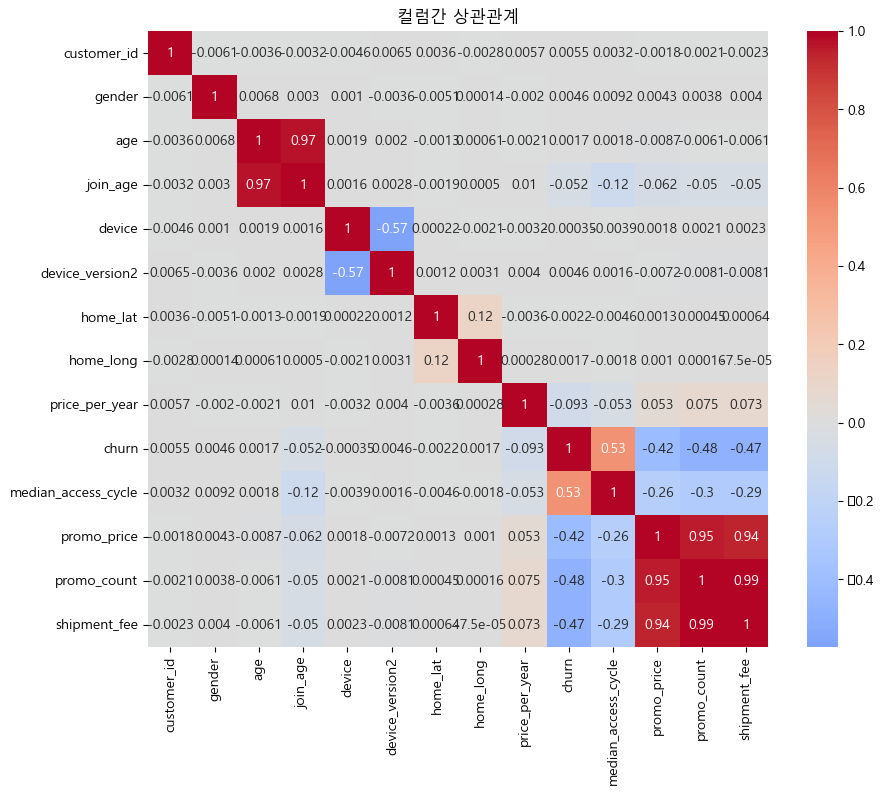

In [24]:
# 컬럼 간 상관관계
corr = df.corr()

# Heatmap을 통한 시각화
plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("컬럼간 상관관계")
plt.show()

In [25]:
# 구매 금액이 여러 컬럼에 영향을 미치는 것을 확인

In [26]:
X = df.drop(["churn", "customer_id"], axis=1)
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, stratify=y_test, random_state=42)

### XGBClassifier 모델

In [27]:
# 기준모델 (XGBClassifier 이용)
pipe = make_pipeline(XGBClassifier(random_state=42,
                                   max_depth=3,
                                   learning_rate=0.05))

In [28]:
# 모델 학습
pipe.fit(X_train, y_train)

# 기준 모델 학습 성능
y_pred_base = pipe.predict(X_train)
print(classification_report(y_train, y_pred_base))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     25002
           1       0.98      0.97      0.97     54998

    accuracy                           0.96     80000
   macro avg       0.96      0.96      0.96     80000
weighted avg       0.96      0.96      0.96     80000



In [29]:
# 실제로 이탈하지 않았는데 이탈했다고 예측(FP) 및 실제로 이탈했는데 이탈하지 않았다고 예측(FN) 시, 잘못된 프로모션 진행 → 이탈률에 개선 X

# recall 값을 중점으로 모델링 진행 예정

In [30]:
# 보다 나은 튜닝을 위해 베이지안 서치 진행 (베이지안 서치를 진행하기 위해 XGB 모델 사용) + 타겟 불균형 문제를 해소하기 위해 SMOTE 진행

#### 베이지안 서치 + SMOTE

In [31]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [32]:
# SMOTE - Bayesian Search

params = {
    "xgbclassifier__max_depth": hp.quniform("max_depth", 3, 5, 1),
    "xgbclassifier__learning_rate": hp.quniform("learning_rate", 0.05, 0.3, 0.05),
    "xgbclassifier__n_estimators": hp.quniform("n_estimators", 50, 300, 50),
    "xgbclassifier__min_child_weight": hp.quniform("min_child_weight", 2, 10, 2),
    "xgbclassifier__colsample_bytree": hp.uniform("colsample_bytree", 0.5, 1.0),
}

In [33]:
def get_pipe(params):
    params["xgbclassifier__max_depth"] = int(params["xgbclassifier__max_depth"])
    params["xgbclassifier__n_estimators"] = int(params["xgbclassifier__n_estimators"])
    pipe = make_pipeline(XGBClassifier(objective="binary:logistic",
                                       eval_metric="auc",
                                       random_state=42,
                                       n_jobs=-1,
                                       use_label_encoder=False))
    
    pipe = pipe.set_params(**params)
    return pipe


def fit_and_eval(params):
    pipe = get_pipe(params)
    score = cross_val_score(pipe, X_train_resampled, y_train_resampled, cv=3, scoring="f1")
    avg_cv_score = np.mean(score)
    # f1은 클수록 좋은 metric >> -부호를 붙여 반환
    return {"loss": -avg_cv_score, "status": STATUS_OK}


trials = (
    Trials()
)  # 실행되는 매 fit의 학습 정보 및 학습 결과가 저장

best_params = fmin(
    fn=fit_and_eval, trials=trials, space=params, algo=tpe.suggest, max_evals=30,
    rstate = np.random.default_rng(2023)
)  # max_evals 횟수만큼 하이퍼파라미터 조합을 탐색

100%|██████████| 30/30 [07:19<00:00, 14.66s/trial, best loss: -0.9853799928253962]


In [34]:
print("최적 하이퍼파라미터: ", trials.best_trial["misc"]["vals"])
print("최적 f1: ", -trials.best_trial["result"]["loss"])

최적 하이퍼파라미터:  {'colsample_bytree': [0.9931172782207743], 'learning_rate': [0.25], 'max_depth': [5.0], 'min_child_weight': [4.0], 'n_estimators': [300.0]}
최적 f1:  0.9853799928253962


In [35]:
smote = XGBClassifier(random_state=42,
                      max_depth=5,
                      learning_rate=0.25,
                      n_estimators=300,
                      min_child_weight=4,
                      colsample_bytree=0.9931172782207743)

In [36]:
# SMOTE 모델 학습
smote.fit(X_train_resampled, y_train_resampled)

# 학습 성능 (train)
y_pred_smote = smote.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54998
           1       1.00      1.00      1.00     54998

    accuracy                           1.00    109996
   macro avg       1.00      1.00      1.00    109996
weighted avg       1.00      1.00      1.00    109996



In [37]:
# 학습 성능 (val)
y_val_pred_smote = smote.predict(X_val)
print(classification_report(y_val, y_val_pred_smote))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5000
           1       0.99      0.99      0.99     11000

    accuracy                           0.98     16000
   macro avg       0.98      0.98      0.98     16000
weighted avg       0.98      0.98      0.98     16000



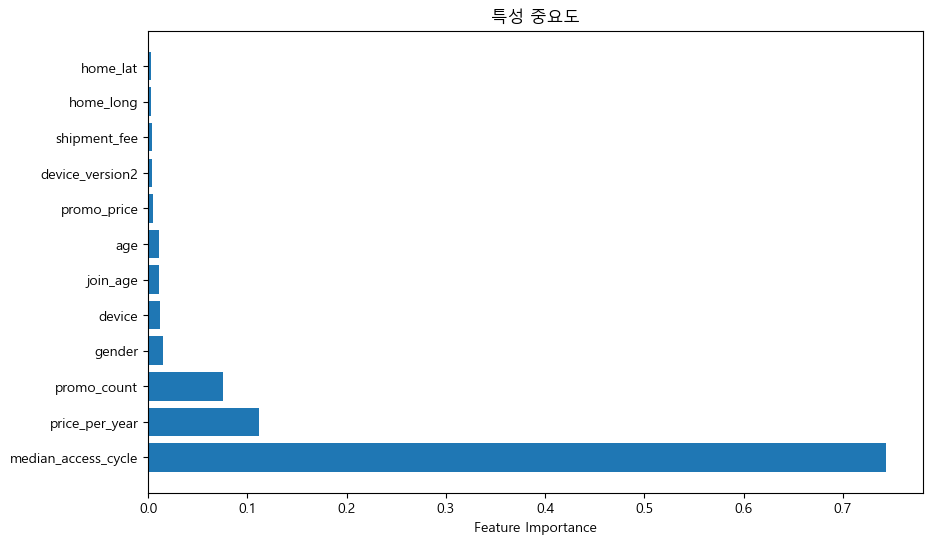

In [38]:
# 특성 중요도
importances = smote.feature_importances_

# 특성 중요도를 내림차순으로 정렬
indices = np.argsort(importances)[::-1]

# 특성 이름 얻기
feature_names = X_train_resampled.columns

indices = indices[:]
importances = importances[indices]
feature_names = feature_names[indices]

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("특성 중요도")
plt.barh(range(len(X_train_resampled.columns)), importances, align="center")
plt.yticks(range(len(X_train_resampled.columns)), feature_names)
plt.xlabel("Feature Importance")
plt.show()

In [39]:
# 접속 주기와 구매한 가격이 큰 비중을 차지

# 중요 특성이 한 곳에 몰려있음 → 다른 모델 시도

### RandomForest 모델

In [40]:
# 모델 학습
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# rf모델에 smote 적용
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
rf.fit(X_train_resampled, y_train_resampled)

# 학습 성능 (train)
y_pred_rf = rf.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54998
           1       1.00      1.00      1.00     54998

    accuracy                           1.00    109996
   macro avg       1.00      1.00      1.00    109996
weighted avg       1.00      1.00      1.00    109996



#### 과적합 해소

##### 중요하지 않은 특성 제거

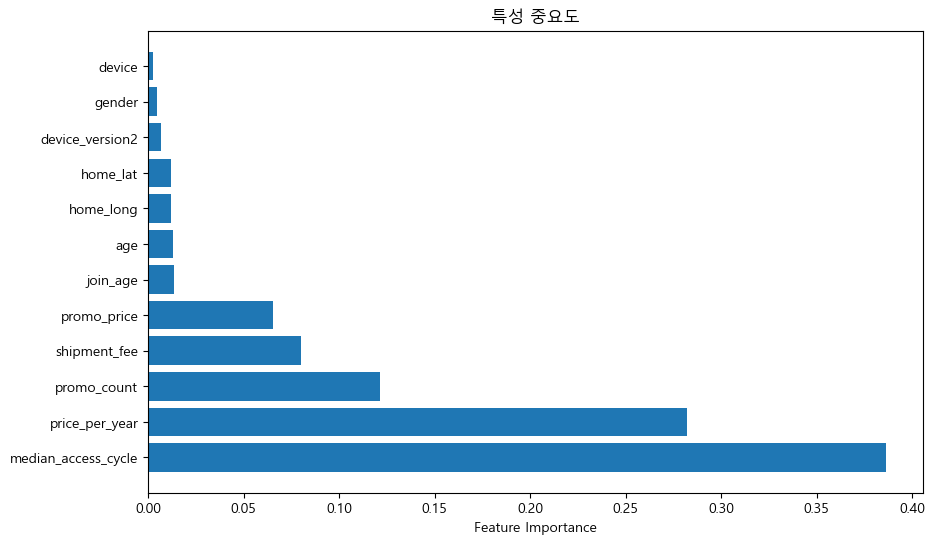

In [41]:
# 특성 중요도
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

indices = indices[:]
importances = importances[indices]
feature_names = feature_names[indices]

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("특성 중요도")
plt.barh(range(len(X_train.columns)), importances, align="center")
plt.yticks(range(len(X_train.columns)), feature_names)
plt.xlabel("Feature Importance")
plt.show()

In [42]:
# RandomForest가 특성중요도 부분에서 더 골고루 영향을 받음 → 최종 모델 : rf 모델로 선정

# 이탈률에 영향을 미치는 요인들 : 소비 금액, 할인 여부, 배송비, 접속주기, 할인액 등

In [43]:
# 중요하지 않은 특성 제거 후, 모델 재학습
X = X.drop(['age', 'home_lat', 'device_version2', 'home_long', 'join_age', 'device', 'gender'], axis=1)
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, stratify=y_test, random_state=42)

# 모델 학습
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# rf모델에 smote 적용
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
rf.fit(X_train_resampled, y_train_resampled)

# 학습 성능 (train)
y_pred_rf = rf.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54998
           1       1.00      1.00      1.00     54998

    accuracy                           1.00    109996
   macro avg       1.00      1.00      1.00    109996
weighted avg       1.00      1.00      1.00    109996



##### 파라미터 튜닝 (GridSearchCV)

In [44]:
# 과적합 해소를 위한 파라미터 튜닝
params = {
    "max_depth": [2, 3, 4],
    "n_estimators": [50, 100],
    "min_samples_split": [10, 15, 20],  # 증가된 분할에 필요한 최소 샘플 수
    "min_samples_leaf": [2, 4, 8],  # 증가된 리프 노드에 필요한 최소 샘플 수
}

In [45]:
# 그리드 서치
grid_search = GridSearchCV(estimator=rf, param_grid=params,
                           cv=3, n_jobs=-1, verbose=3, scoring='recall')

# 그리드 서치 실행
grid_search.fit(X_train_resampled, y_train_resampled)

# 최적의 파라미터와 성능 출력
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters found:  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation score: 0.95


In [47]:
rf_tuned = RandomForestClassifier(
    n_estimators=50,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=10,
    random_state=42
)

# 모델 학습
rf_tuned.fit(X_train_resampled, y_train_resampled)

# 학습 성능 (train)
y_pred_tuned = rf_tuned.predict(X_train_resampled)
print(classification_report(y_train_resampled, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     54998
           1       0.97      0.95      0.96     54998

    accuracy                           0.96    109996
   macro avg       0.96      0.96      0.96    109996
weighted avg       0.96      0.96      0.96    109996



In [48]:
# 학습 성능 (val)
y_val_pred_tuned = rf_tuned.predict(X_val)
print(classification_report(y_val, y_val_pred_tuned))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5000
           1       0.99      0.95      0.97     11000

    accuracy                           0.96     16000
   macro avg       0.95      0.96      0.95     16000
weighted avg       0.96      0.96      0.96     16000



In [49]:
# 학습 성능 (test)
y_test_pred_tuned = rf_tuned.predict(X_test)
print(classification_report(y_test, y_test_pred_tuned))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1250
           1       0.98      0.95      0.97      2750

    accuracy                           0.96      4000
   macro avg       0.94      0.96      0.95      4000
weighted avg       0.96      0.96      0.96      4000



In [50]:
# 정확도 0.96의 성능을 보임

# 이탈에 영향을 미치는 중요 특성은 소비 금액, 할인 여부, 배송비, 접속 주기, 할인액
# >> 해당 특성을 이용하여 액션아이템 설계